In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [29]:
df = pd.read_csv("laptop_price.csv")

In [36]:
df = df.drop(["Product"], axis=1)

In [73]:
toModify = ["Company", "TypeName", "ScreenResolution", "CPU_Company", "CPU_Type", "Memory", "GPU_Company", "GPU_Type", "OpSys"]
for col in toModify:
    df[col] = df[col].apply(lambda x: list(df[col].unique()).index(x))
df.head()

,Company,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,0,0,13.3,0,0,0,2.3,8,0,0,0,0,1.37,1339.69
1,0,0,13.3,1,0,0,1.8,8,1,0,1,0,1.34,898.94
2,1,1,15.6,2,0,1,2.5,8,2,0,2,1,1.86,575.00
3,0,0,15.4,3,0,2,2.7,16,3,1,3,0,1.83,2537.45
4,0,0,13.3,0,0,0,3.1,8,2,0,4,0,1.37,1803.60


In [74]:
# X = np.array([x for x in range(100)])
# X = X.reshape(-1, 1)
# y = 46 + 2 * X.flatten()
X = np.array(df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'CPU_Company',
       'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory', 'GPU_Company',
       'GPU_Type', 'OpSys', 'Weight (kg)']])
X = X.reshape(-1, 13)
y = np.array(df["Price (Euro)"])

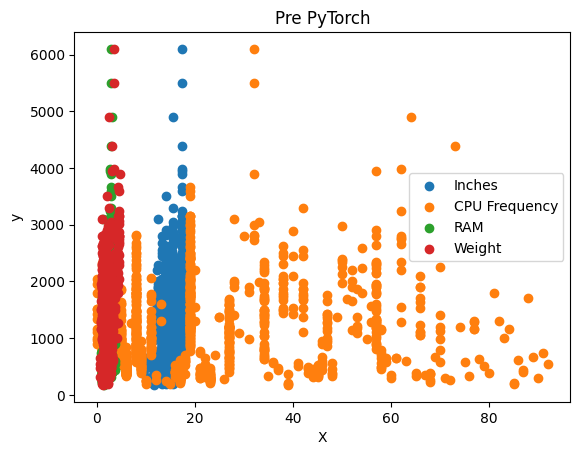

In [79]:
plt.scatter(X[:,2], y, label="Inches")
plt.scatter(X[:,5], y, label="CPU Frequency")
plt.scatter(X[:,6], y, label="RAM")
plt.scatter(X[:,12], y, label="Weight")
plt.title("Pre PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [135]:
# Normalizing the data
x_mean, x_std = X.mean(axis=0), X.std(axis=0)
X_normalized = (X - x_mean) / x_std
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)

y_mean, y_std = y.mean(), y.std()
y_normalized = (y - y_mean) / y_std
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.3
)

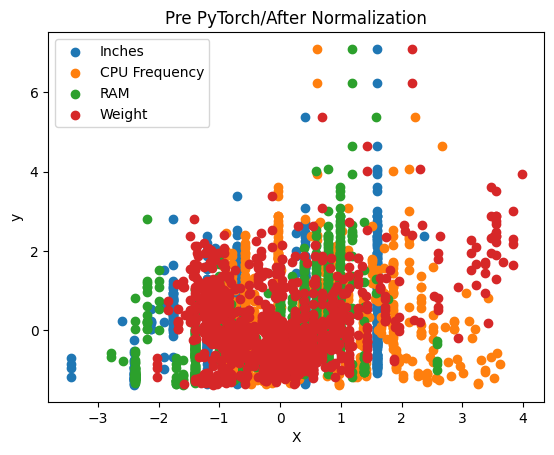

In [137]:
plt.scatter(X_normalized[:,2], y_normalized, label="Inches")
plt.scatter(X_normalized[:,5], y_normalized, label="CPU Frequency")
plt.scatter(X_normalized[:,6], y_normalized, label="RAM")
plt.scatter(X_normalized[:,12], y_normalized, label="Weight")
plt.title("Pre PyTorch/After Normalization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [138]:
class LinearRegressionModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x).squeeze(1)

In [139]:
in_features = 13
out_features = 1
model = LinearRegressionModel(in_features, out_features)

In [140]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
num_epochs = 20

In [146]:
for epoch in range(num_epochs):
    # Forward Pass
    outputs = model(X_train)

    # Calculate Loss
    loss = criterion(outputs, y_train)

    # Backward Pass and Optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.2f}')

Epoch [1/10], Loss: 0.38
Epoch [2/10], Loss: 0.38
Epoch [3/10], Loss: 0.38
Epoch [4/10], Loss: 0.38
Epoch [5/10], Loss: 0.38
Epoch [6/10], Loss: 0.38
Epoch [7/10], Loss: 0.37
Epoch [8/10], Loss: 0.37
Epoch [9/10], Loss: 0.37
Epoch [10/10], Loss: 0.37


In [149]:
def denormalize(val):
    return (val * y_std) + y_mean

In [151]:
model.eval()
with torch.no_grad():
    prediction = model(X_test)

for pred, y in zip(prediction, y_test):
    print(f"Predicted: {denormalize(pred):.2f} Real: {denormalize(y):.2f}")

Predicted: 1052.05 Real: 799.00
Predicted: 1238.68 Real: 1199.00
Predicted: 775.94 Real: 530.00
Predicted: 613.96 Real: 450.00
Predicted: 502.86 Real: 229.00
Predicted: 649.60 Real: 912.50
Predicted: 1217.36 Real: 1191.00
Predicted: 1199.41 Real: 779.00
Predicted: 767.77 Real: 559.00
Predicted: 1271.45 Real: 2040.00
Predicted: 1263.05 Real: 1650.00
Predicted: 1025.60 Real: 999.00
Predicted: 1888.57 Real: 1425.00
Predicted: 401.80 Real: 379.00
Predicted: 1038.98 Real: 597.00
Predicted: 1180.29 Real: 1149.00
Predicted: 570.35 Real: 499.00
Predicted: 1158.60 Real: 1500.00
Predicted: 607.50 Real: 722.00
Predicted: 626.25 Real: 333.00
Predicted: 1107.65 Real: 745.00
Predicted: 2032.07 Real: 2813.75
Predicted: 2031.12 Real: 2349.00
Predicted: 1177.52 Real: 599.00
Predicted: 646.25 Real: 196.00
Predicted: 680.72 Real: 476.99
Predicted: 1128.35 Real: 1829.00
Predicted: 819.04 Real: 1299.00
Predicted: 571.62 Real: 675.00
Predicted: 604.34 Real: 324.00
Predicted: 953.21 Real: 1103.00
Predicted: 

<Axes: ylabel='Count'>

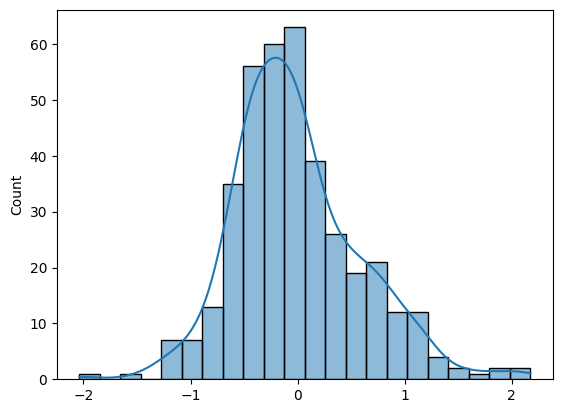

In [148]:
import seaborn as sns
sns.histplot((y_test-prediction), kde=True)